<a href="https://colab.research.google.com/github/martinpius/RNN-ALIENS/blob/main/RNN_crash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are on CoLab with tensorflow version {tf.__version__}")
except Exception as e:
  print(f"{type(e)}: {e}\n...please load your drive...")
  COLAB = False
def time_fmt(t: float = 123.9879)->float:
  h = int(t / (60 * 60))
  m = int(t % (60 * 60) / 60)
  s = int(t % 60)
  return f"{h}: {m:>03}: {s:>05.2f}"
print(f"....testing time....testing time....testing time....\ntime elapse: {time_fmt()}")

Mounted at /content/drive
You are on CoLab with tensorflow version 2.4.1
....testing time....testing time....testing time....
time elapse: 0: 002: 03.00


In [ ]:
#We train the simple rnn, gru and lstm on mnist dataset(for illustration):
import tensorflow as tf
import numpy as np
import time


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train, x_test = x_train.astype(np.float32)/255.0, x_test.astype(np.float32)/255.0

In [ ]:
#y_train, y_test = tf.keras.utils.to_categorical(y_train, num_classes = 10), tf.keras.utils.to_categorical(y_test, num_classes = 10)

Model: "simple_rnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 28)]        0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 512)         276992    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               196864    
_________________________________________________________________
outputs (Dense)              (None, 10)                2570      
Total params: 476,426
Trainable params: 476,426
Non-trainable params: 0
_________________________________________________________________


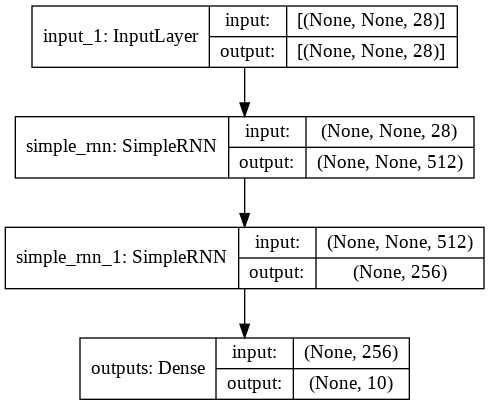

In [ ]:
#We can build the simple RNN model as follows:
inputs = tf.keras.Input(shape = (None, 28))
x = tf.keras.layers.SimpleRNN(units = 512, return_sequences = True, activation = 'tanh')(inputs)
x = tf.keras.layers.SimpleRNN(units = 256, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(units = 10, name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'simple_rnn')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'simple_rnn.png', show_shapes = True)


In [ ]:
#Compiling and train the model on mnist dataset:

In [ ]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = 'Adam', metrics = ['accuracy'])

In [ ]:
tic = time.time()
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20, batch_size = 64, verbose = 2)
model.evaluate(x_test, y_test, verbose = 1, batch_size = 64)
toc = time.time()
print(f"\ntime elapse is {time_fmt(toc - tic)} seconds")

Epoch 1/20
938/938 - 38s - loss: 0.3213 - accuracy: 0.9035 - val_loss: 0.2129 - val_accuracy: 0.9361
Epoch 2/20
938/938 - 37s - loss: 0.2287 - accuracy: 0.9334 - val_loss: 0.1790 - val_accuracy: 0.9490
Epoch 3/20
938/938 - 37s - loss: 0.2106 - accuracy: 0.9382 - val_loss: 0.2534 - val_accuracy: 0.9285
Epoch 4/20
938/938 - 37s - loss: 0.1898 - accuracy: 0.9441 - val_loss: 0.1522 - val_accuracy: 0.9575
Epoch 5/20
938/938 - 37s - loss: 0.1798 - accuracy: 0.9479 - val_loss: 0.1706 - val_accuracy: 0.9532
Epoch 6/20
938/938 - 36s - loss: 0.1801 - accuracy: 0.9475 - val_loss: 0.1491 - val_accuracy: 0.9622
Epoch 7/20
938/938 - 36s - loss: 0.1652 - accuracy: 0.9516 - val_loss: 0.2131 - val_accuracy: 0.9372
Epoch 8/20
938/938 - 36s - loss: 0.1499 - accuracy: 0.9564 - val_loss: 0.1588 - val_accuracy: 0.9560
Epoch 9/20
938/938 - 36s - loss: 0.1608 - accuracy: 0.9530 - val_loss: 0.1683 - val_accuracy: 0.9512
Epoch 10/20
938/938 - 36s - loss: 0.1529 - accuracy: 0.9560 - val_loss: 0.1804 - val_accura

In [ ]:
#We can build the gru insteady of a simple rnn:

In [ ]:
inputs = inputs
x = tf.keras.layers.GRU(units = 256, return_sequences = True, activation = 'tanh')(inputs)
x = tf.keras.layers.GRU(units = 128, activation = 'tanh')(x)
outputs = tf.keras.layers.Dense(units = 10, name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'gru_mnist')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'gru_mnist.png', show_shapes = True)
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = 'RMSprop', metrics = ['accuracy'])
tic = time.time()
model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, verbose = 2, epochs = 20)
model.evaluate(x_test, y_test, batch_size = 64, verbose = 1)
toc = time.time()
print(f"\ntime elapse for gru in second: {time_fmt(toc - tic)}")



Model: "gru_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 28)]        0         
_________________________________________________________________
gru (GRU)                    (None, None, 256)         219648    
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               148224    
_________________________________________________________________
outputs (Dense)              (None, 10)                1290      
Total params: 369,162
Trainable params: 369,162
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
938/938 - 37s - loss: 0.3124 - accuracy: 0.8961 - val_loss: 0.0751 - val_accuracy: 0.9768
Epoch 2/20
938/938 - 6s - loss: 0.0744 - accuracy: 0.9774 - val_loss: 0.0561 - val_accuracy: 0.9826
Epoch 3/20
938/938 - 6s - loss: 0.0503 - accurac

In [ ]:
inputs = inputs
x = tf.keras.layers.LSTM(units = 256, return_sequences = True, activation = 'tanh')(inputs)
x = tf.keras.layers.LSTM(units = 128, activation = 'tanh')(x)
outputs = tf.keras.layers.Dense(units = 10, name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'gru_mnist')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'gru_mnist.png', show_shapes = True)
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = 'RMSprop', metrics = ['accuracy'])
tic = time.time()
model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, verbose = 2, epochs = 20)
model.evaluate(x_test, y_test, batch_size = 64, verbose = 1)
toc = time.time()
print(f"\ntime elapse for gru in second: {time_fmt(toc - tic)}")



Model: "gru_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 28)]        0         
_________________________________________________________________
lstm (LSTM)                  (None, None, 256)         291840    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               197120    
_________________________________________________________________
outputs (Dense)              (None, 10)                1290      
Total params: 490,250
Trainable params: 490,250
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
938/938 - 9s - loss: 0.3514 - accuracy: 0.8862 - val_loss: 0.1197 - val_accuracy: 0.9641
Epoch 2/20
938/938 - 6s - loss: 0.0951 - accuracy: 0.9720 - val_loss: 0.0651 - val_accuracy: 0.9817
Epoch 3/20
938/938 - 6s - loss: 0.0634 - accuracy

In [ ]:
#We can also extend to biderectional rnnLSTM as follows:

In [ ]:
inputs = inputs
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 256, return_sequences = True, activation = 'tanh'))(inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 128, activation = 'tanh'))(x)
outputs = tf.keras.layers.Dense(units = 10, name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'gru_mnist')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'gru_mnist.png', show_shapes = True)
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = 'RMSprop', metrics = ['accuracy'])
tic = time.time()
model.fit(x_train, y_train, validation_data = (x_test, y_test), batch_size = 64, verbose = 2, epochs = 20)
model.evaluate(x_test, y_test, batch_size = 64, verbose = 1)
toc = time.time()
print(f"\ntime elapse for B-LSTM in second: {time_fmt(toc - tic)}")



Model: "gru_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 28)]        0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 512)         583680    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               656384    
_________________________________________________________________
outputs (Dense)              (None, 10)                2570      
Total params: 1,242,634
Trainable params: 1,242,634
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
938/938 - 18s - loss: 0.2918 - accuracy: 0.9044 - val_loss: 0.1045 - val_accuracy: 0.9654
Epoch 2/20
938/938 - 12s - loss: 0.0784 - accuracy: 0.9763 - val_loss: 0.0857 - val_accuracy: 0.9729
Epoch 3/20
938/938 - 12s - loss: 0.0517 - a